# 1 NLP for text classification
 Import Necessary Libraries
To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [1]:
import sys
import nltk
import sklearn
import pandas
import numpy

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
NLTK: 3.4.5
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1


# 2. Load the Dataset
Now that we have ensured that our libraries are installed correctly, let's load the data set as a Pandas DataFrame. Furthermore, let's extract some useful information such as the column information and class distributions.

The data set we will be using comes from the UCI Machine Learning Repository.
It contains over 5000 SMS labeled messages that have been collected for mobile phone spam research. It can be downloaded from the following URL:

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_table(r'E:\kushi\datasets\Natural-Language-Processing-Projects-master\Spam SMS Classification\Spam SMS Collection', sep='\t',names=["label","message"] ,header=None, encoding='utf-8')

# 3 Exploring the Dataset

In [4]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
#what is shape of dataset
print("Input data has {} rows and {} col".format(len(df),len(df.columns)))

Input data has 5572 rows and 2 col


In [6]:
#how many spam/ham are there in dataset
print("out of {} rows {} are spam {} are ham".format(len(df),len(df[df['label']=='spam']),
                                                                len(df[df['label']=='ham'])))

out of 5572 rows 747 are spam 4825 are ham


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [8]:
print(df.isnull)

<bound method DataFrame.isnull of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>


In [9]:
df.head

<bound method NDFrame.head of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df.columns

Index(['label', 'message'], dtype='object')

# 4 Classification visualization

In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

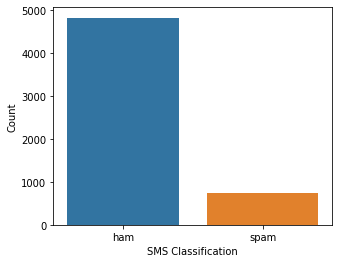

In [12]:
# Visualizing the count of 'spam' messages in the dataset
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

# 5 Data Cleaning and Preprocessing

In [13]:
# Importing essential libraries for performing NLP on 'SMS Spam Collection' dataset
import nltk      #library
import re       #regural expression for removing are replace the data
nltk.download('stopwords')
from nltk.corpus import stopwords #stopwords for checking and remove of unwanted words in data
from nltk.stem.porter import PorterStemmer #for getting similar words by using stemming
#from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
# Cleaning the messages
corpus = []        #after completing the cleaning process data stores in corpus variable
ps = PorterStemmer()  #PorterStemmer one of stemming process
#lemmatizer = WordNetLemmatizer()

for i in range(0,df.shape[0]):

# Cleaning special character from the message
# except the alphabets reamining are substitute with space
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])

# Converting the entire message into lower case
# for not getting identical words we perform data into lower case
  message = message.lower()

# Tokenizing the review by words
# splits sentence into words
  words = message.split()

# Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

# Stemming the words
  words = [ps.stem(word) for word in words]
  #words=[lemmatizer.lemmatize(word) for word in words]

# Joining the stemmed words
  message = ' '.join(words)

# Building a corpus of messages
  corpus.append(message)

In [15]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [17]:
# Creating the Bag of Words model
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=2500)
#X = cv.fit_transform(corpus).toarray()

In [16]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [17]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

# 6 Model building

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# prepare models
seed=7
names=["label","message"]
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.967339 (0.009099)


C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.954773 (0.006465)


C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.913319 (0.008657)


C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.964823 (0.006026)


C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.973258 (0.006594)


C:\Python27\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.981694 (0.006258)


# Here SVM as perform well when compare to other models so lets tune by using SVM model and also on Navie bayes.

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['rbf', 'poly', 'sigmoid']}

In [38]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.4min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total= 2.3min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total= 2.3min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total= 2.3min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=  54.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 69.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [39]:
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [81]:
grid_predictions = grid.predict(X_test)
cm=confusion_matrix(y_test,grid_predictions)
print(classification_report(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.99      0.92      0.95       160

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [82]:
cm

array([[954,   1],
       [ 13, 147]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

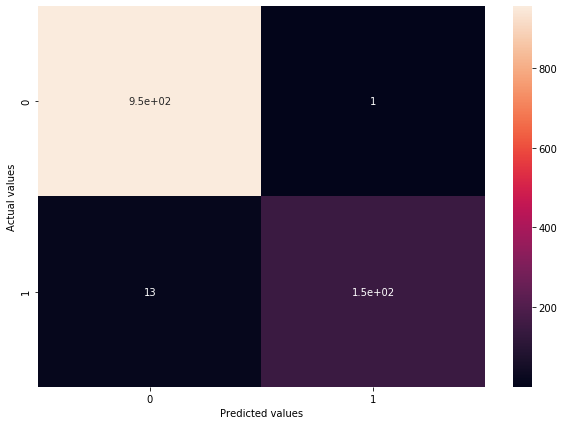

In [83]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test,grid_predictions )
score2 = precision_score(y_test, grid_predictions)
score3 = recall_score(y_test, grid_predictions)
print(" Scores ")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

 Scores 
Accuracy score is: 98.74%
Precision score is: 0.99
Recall score is: 0.92


In [48]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [50]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print(" Scores ")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

 Scores 
Accuracy score is: 97.31%
Precision score is: 1.0
Recall score is: 0.81


In [51]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[955,   0],
       [ 30, 130]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

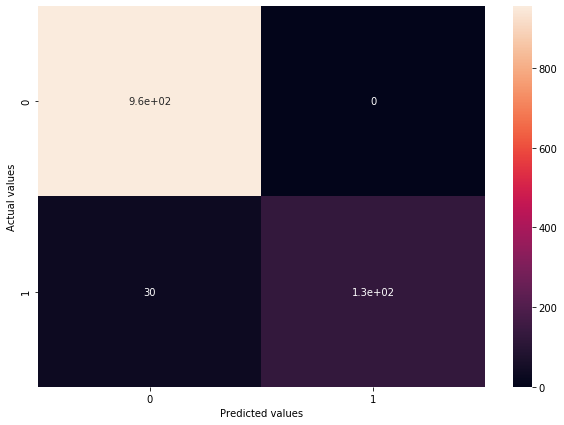

In [52]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

from below code we get the best alpha value in which we predict by giving values in range

In [53]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Python27\anaconda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 98.3%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.48%
Accuracy score for alpha=0.3 is: 98.48%
Accuracy score for alpha=0.4 is: 98.12%
Accuracy score for alpha=0.5 is: 98.03%
Accuracy score for alpha=0.6 is: 97.94%
Accuracy score for alpha=0.7 is: 97.67%
Accuracy score for alpha=0.8 is: 97.49%
Accuracy score for alpha=0.9 is: 97.4%
Accuracy score for alpha=1.0 is: 97.31%
The best accuracy is 98.48% with alpha value as 0.2


Has we have tune the model for best alpha value we got at 0.3 .
Now we train model aplha value at 0.3 and predict the accuracy score 

In [54]:
classifier = MultinomialNB(alpha=0.3) #fixing alpha value at 0.3 
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print(" Scores ")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

 Scores 
Accuracy score is: 98.48%
Precision score is: 1.0
Recall score is: 0.89


Finall we have achieved a better accuracy when compared to SVM and Navie bayes,svm as 98.74%  I think it feel good for the model and it performed well next predict some sample msg whether it predict correct  or not

# Predicton Checking whether it normal  or spam msg

In [85]:
def predict_spam(sample_msg):
  sample_msg = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_msg)
  sample_msg = sample_msg.lower()
  sample_msg_words = sample_msg.split()
  sample_msg_words = [word for word in sample_msg_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_msg = [ps.stem(word) for word in sample_msg_words]
  final_msg = ' '.join(final_msg)

  temp = tfidf_v.transform([final_msg]).toarray()
  return classifier.predict(temp)

In [88]:
# Predicting values
sample_msg = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_msg):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [87]:
# Predicting values
sample_msg = 'Here is your Computer Vision and Deep Learning Resource Guide PDF!'

if predict_spam(sample_msg):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.
